## 双指针总结

双指针不是技巧，而是一种：

> 用两个索引控制区间或相对位置，从而将 O(n²) 优化到 O(n)

它依赖一个核心前提：

* 有单调性
* 或有区间连续性
* 或可以通过排序制造单调性



二、双指针的四种核心模型



1️⃣ 对撞型双指针（左右夹逼）

结构：

```
left = 0
right = n - 1
while left < right:
```

适用场景：

* 已排序数组
* 存在单调性
* 求两数之和
* 最大面积类问题

典型题：

* 两数之和 II
* 盛最多水的容器
* 三数之和（外层排序 + 内层双指针）

核心思想：

通过移动一端指针排除一整块无效解。

时间复杂度：

O(n)



2️⃣ 快慢指针（同向移动）

结构：

```
slow = 0
for fast in range(n):
```

适用场景：

* 原地删除
* 去重
* 移动元素
* 数组压缩

典型题：

* 删除排序数组中的重复项
* 移动零
* 删除元素

核心思想：

slow 维护“有效区间”，
fast 用于扫描。

时间复杂度：

O(n)



3️⃣ 滑动窗口（区间双指针）

结构：

```
left = 0
for right in range(n):
    while 不满足条件:
        left += 1
```

适用场景：

* 连续子数组
* 最长/最短子串
* 子数组和问题

典型题：

* 最长无重复子串
* 最小覆盖子串
* 长度最小的子数组

核心思想：

维护一个动态区间 [left, right]。

时间复杂度：

O(n)

关键原因：

left 和 right 都只前进不后退。



4️⃣ 分组处理型双指针

结构：

```
i = 0
while i < n:
    j = i
    while j < n and nums[j] == nums[i]:
        j += 1
    # 处理 [i, j)
    i = j
```

适用场景：

* 分组统计
* 统计连续区间
* 三数之和去重

核心思想：

一次跳过一整段相同元素。

时间复杂度：

O(n)



三、什么时候想到双指针？

看到以下关键词时：

* 有序数组
* 连续子数组
* 子串
* 原地修改
* 不允许额外空间
* 两数 / 三数 / k 数问题
* 最大最小区间问题

优先尝试：

排序 + 双指针



四、双指针 vs 暴力

例如两数之和：

暴力：

O(n²)

排序 + 双指针：

O(n log n)（排序） + O(n)

若本身已排序：

O(n)



五、双指针的复杂度本质

为什么很多双指针是 O(n)？

因为：

每个指针最多移动 n 次。

例如滑动窗口：

* right 走 n 步
* left 走 n 步

总步数 ≤ 2n

因此是线性。



六、双指针常见错误

1️⃣ 忘记排序
2️⃣ 指针移动方向写错
3️⃣ 滑动窗口没有 while 收缩
4️⃣ 去重逻辑写错
5️⃣ 边界条件错误



七、双指针的统一抽象

可以统一理解为：

> 利用数组的顺序结构，通过控制两个边界缩小搜索空间。

其优化来源是：

每次移动都能排除一部分不可能的解。



八、Hot100 双指针题型分布

对撞型：

* 盛最多水的容器
* 三数之和
* 有序数组两数之和

快慢指针：

* 移动零
* 删除重复项

滑动窗口：

* 最长无重复子串
* 最小覆盖子串



九、一句话总结

双指针的本质是：

“用单调移动换掉嵌套循环。”

只要存在顺序结构，就优先思考是否能用两个边界控制区间。

---


## 283.移动零
给定一个数组 nums，编写一个函数将所有 0 移动到数组的末尾，同时保持非零元素的相对顺序。

请注意 ，必须在不复制数组的情况下原地对数组进行操作。

In [1]:
from typing import List
class Solution:
    def moveZeroes(self, nums: List[int]) -> None:
        write = 0
        n = len(nums)
        for x in nums:
            if x != 0:
                nums[write] = x
                write += 1
                
        for i in range(write, n):
            nums[i] = 0
        return nums
print(Solution().moveZeroes([0,1,0,3,12]))  # 输出 [1,3,12,0,0]

[1, 3, 12, 0, 0]


**时间复杂度分析**

算法包含两次线性遍历：

1. 第一轮遍历 `nums`
   逐个读取元素，将所有非零元素按原有相对顺序写回数组前部，遍历次数为 (n)。

2. 第二轮遍历区间 `[write, n)`
   将剩余位置全部填充为 0，最坏情况下同样需要遍历 (n) 次。

两轮遍历是顺序执行而非嵌套，整体操作次数与数组长度成正比。

因此，总时间复杂度为
[
O(n)
]

**空间复杂度分析**

算法只使用了常数级额外变量（`write`、`n`、循环变量），所有操作均在原数组上原地完成，没有分配与输入规模相关的新空间。

因此，空间复杂度为
[
O(1)
]

---

## 11.盛最多水的容器
给定一个长度为 n 的整数数组 height 。有 n 条垂线，第 i 条线的两个端点是 (i, 0) 和 (i, height[i]) 。

找出其中的两条线，使得它们与 x 轴共同构成的容器可以容纳最多的水。

返回容器可以储存的最大水量。

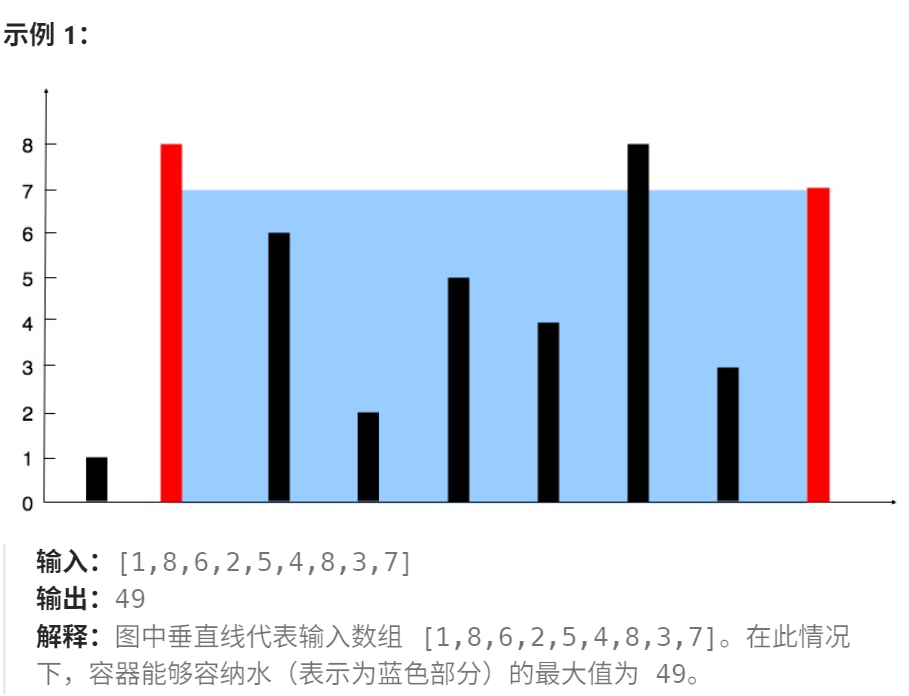

In [2]:
from typing import List

class Solution:
    def maxArea(self, height: List[int]) -> int:
        """
        双指针：l 从左、r 从右向内夹逼
        每次计算当前面积，并移动较短的一侧
        """
        l, r = 0, len(height) - 1
        best = 0

        while l < r:
            # 以短板为高，(r - l) 为宽
            h = min(height[l], height[r])
            area = h * (r - l)
            if area > best:
                best = area

            # 移动较短的一侧，期望找到更高的短板
            if height[l] < height[r]:
                l += 1
            else:
                r -= 1

        return best
print(Solution().maxArea([1,8,6,2,5,4,8,3,7]))  # 输出 49

49


**时间复杂度分析**

使用双指针从数组两端向中间收缩。指针 `l` 与 `r` 在整个过程中都只会单向移动，每一步至少有一个指针向内移动一次。
因此，循环最多执行 (n-1) 次，其中 (n) 为数组长度。

整体时间复杂度为
[
O(n)
]

**空间复杂度分析**

算法只使用了常数个辅助变量（`l`、`r`、`best`、`h`、`area`），不依赖于输入规模的额外存储空间。

因此，空间复杂度为
[
O(1)
]


---


## 15.三数之和
题目描述：给你一个整数数组 nums ，判断是否存在三元组 [nums[i], nums[j], nums[k]] 满足 i != j、i != k 且 j != k ，同时还满足 nums[i] + nums[j] + nums[k] == 0 。请你返回所有和为 0 且不重复的三元组。
注意：答案中不可以包含重复的三元组。

解题思路：排序是基础：既为了双指针，又为了去重与剪枝。

In [3]:
from typing import List

class Solution:
    def threeSum(self, nums: List[int]) -> List[List[int]]:
        nums.sort()
        n = len(nums)
        ans: List[List[int]] = []

        for i in range(n):
            # a>0，后面更不可能凑到0
            if nums[i] > 0:
                break

            # 跳过相同的 a
            if i > 0 and nums[i] == nums[i - 1]:
                continue

            # a + 最大两数仍 < 0，则 a 太小，换更大的 a
            if i + 2 < n and nums[i] + nums[n - 1] + nums[n - 2] < 0:
                continue

            l, r = i + 1, n - 1
            while l < r:
                s = nums[i] + nums[l] + nums[r]
                if s == 0:
                    ans.append([nums[i], nums[l], nums[r]])

                    # 跳过重复的数值
                    l_val, r_val = nums[l], nums[r]
                    while l < r and nums[l] == l_val:
                        l += 1
                    while l < r and nums[r] == r_val:
                        r -= 1

                elif s < 0:
                    l += 1
                else:
                    r -= 1

        return ans

if __name__ == "__main__":
    print(Solution().threeSum([-1,0,1,2,-1,-4]))  # [[-1,-1,2],[-1,0,1]]
    print(Solution().threeSum([-4,-2,-2,-2,0,1,2,2,2,3,3,4,4,6,6])) # 复杂重复
    print(Solution().threeSum([-5,3,-4,1,2]))  # 需大数拉和的情况，剪枝不误判
    print(Solution().threeSum([0,0,0,0]))  # [[0,0,0]]
    print(Solution().threeSum([]))  # []

[[-1, -1, 2], [-1, 0, 1]]
[[-4, -2, 6], [-4, 0, 4], [-4, 1, 3], [-4, 2, 2], [-2, -2, 4], [-2, 0, 2]]
[[-5, 2, 3], [-4, 1, 3]]
[[0, 0, 0]]
[]


**时间复杂度分析**

1. 排序阶段
   对数组 `nums` 进行排序，时间复杂度为 (O(n \log n))。

2. 主循环 + 双指针阶段
   外层循环变量 `i` 最多遍历 (n) 次。
   在固定 `i` 的情况下，左右指针 `l`、`r` 在区间 ([i+1, n-1]) 内单调移动，每个元素最多被访问一次，因此内层 `while l < r` 的时间复杂度为 (O(n))。

整体来看，双指针部分的最坏时间复杂度为
[
O(n) * O(n) = O(n^2)
]

其中的剪枝条件（如 `nums[i] > 0`、最大两数和仍小于 0、跳过重复值）只能减少常数或提前结束，不改变最坏情况下的渐进复杂度。

综合排序与搜索两部分，整体时间复杂度为
[
O(n \log n + n^2) = O(n^2)
]


**空间复杂度分析**

1. 额外辅助空间
   除返回结果 `ans` 外，只使用了常数级变量（指针、临时和），算法本身的辅助空间为 (O(1))。

2. 排序的空间开销
   Python 内置排序使用 Timsort，最坏情况下需要 (O(n)) 的额外空间。

因此，综合考虑语言实现，空间复杂度为
[
O(n)
]

若忽略排序实现的内部开销、只从算法思想角度分析，则为
[
O(1)
]

---

## 42.接雨水
给定 n 个非负整数表示每个宽度为 1 的柱子的高度图，计算按此排列的柱子，下雨之后能接多少雨水。

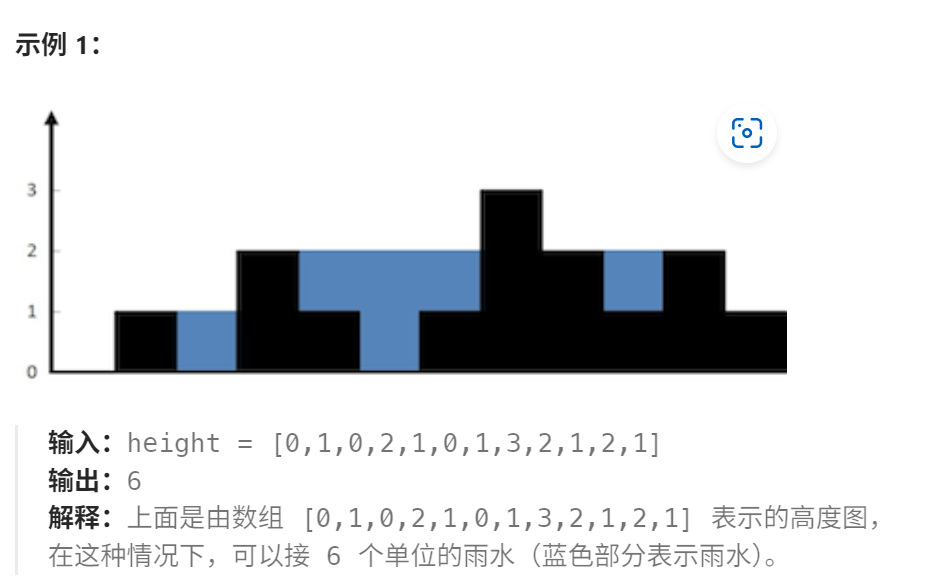

In [4]:
from typing import List  # 仅用到 List 类型注解，方便阅读与面试规范

class Solution:
    def trap(self, height: List[int]) -> int:
        # ─────────────────────────────────────────────────────────
        # 1) 边界处理：长度小于 3，至少有两堵墙+中间的坑，才可能积水
        # ─────────────────────────────────────────────────────────
        n = len(height)            # 读入数组长度，避免每次循环都 len()
        if n < 3:                  # 少于 3 根柱子，不可能形成“凹槽”
            return 0               # 直接返回 0

        # ─────────────────────────────────────────────────────────
        # 2) 初始化双指针与两侧最高值
        # ─────────────────────────────────────────────────────────
        l, r = 0, n - 1            # l 指向最左，r 指向最右；双指针向中间逼近
        left_max = 0               # 扫描到当前 l 位置为止，左侧出现过的最高柱子高度
        right_max = 0              # 扫描到当前 r 位置为止，右侧出现过的最高柱子高度
        ans = 0                    # 累加雨水总量

        # ─────────────────────────────────────────────────────────
        # 3) 主循环：每次只“结算”较矮一侧的水量，然后移动那一侧的指针
        #    核心不变量：left_max 永远是 [0..l] 的最高，right_max 永远是 [r..n-1] 的最高
        # ─────────────────────────────────────────────────────────
        while l < r:               # 指针相遇时，所有位置都已经被考虑过
            # 关键判断：比较两侧当前柱子的高度（不是 max），
            # 谁矮，谁那一边的“水位上限”就已经被确定为各自的 side_max（左用 left_max，右用 right_max）
            if height[l] < height[r]:
                # 进入这里，说明左侧当前柱子 height[l] 所在位置，最终水位上限只受 left_max 限制
                # 因为右边至少有 height[r]，而 height[l] < height[r]，所以 min(left_max, right_max) == left_max 或更小的一侧
                if height[l] >= left_max:
                    # 如果当前左柱子比“已知左侧最高”还高/相等：更新左侧最高
                    # 这里不能加水，因为水位线由更矮的挡板决定，
                    # 当“当前柱子 >= left_max”时，左侧没有挡板比它更高，不会形成坑
                    left_max = height[l]
                else:
                    # 当前左柱子比 left_max 低：就能积水
                    # 该位置的水高 = left_max - height[l]
                    # 不用再和 right_max 取 min，因为前面的 if 已经保证 left 是更矮一侧
                    ans += left_max - height[l]
                # 处理完左侧当前格子，左指针右移，继续看下一个
                l += 1
            else:
                # 对称情况：height[r] <= height[l]，右边是较矮一侧（或相等也放在右侧处理）
                if height[r] >= right_max:
                    # 右柱子刷新右侧最高值
                    right_max = height[r]
                else:
                    # 右柱子比 right_max 低：能积水
                    # 该位置的水高 = right_max - height[r]
                    ans += right_max - height[r]
                # 处理完右侧当前格子，右指针左移
                r -= 1

        # 所有位置都被结算过，返回答案
        return ans
print(Solution().trap([0,1,0,2,1,0,1,3,2,1,2,1]))  # 输出 6


6


**时间复杂度分析**

算法采用双指针从数组两端向中间收缩。指针 `l` 与 `r` 在整个过程中都只会单向移动，每一次循环至少有一个指针向内移动一步。
因此，`while l < r` 循环最多执行 (n-1) 次，其中 (n) 为柱子数量。

循环体内的操作均为常数时间（比较、赋值、加法），不存在嵌套循环或回溯。

整体时间复杂度为
[
O(n)
]


**空间复杂度分析**

算法仅使用了有限个辅助变量（`l`、`r`、`left_max`、`right_max`、`ans`），不依赖输入规模分配额外存储空间。

因此，空间复杂度为
[
O(1)
]

---
